In [15]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

In [2]:
#https://stackoverflow.com/questions/34734714/ipython-jupyter-uploading-folder for unzipping data

### Overall structure of defining a unsupervised model in sklearn
1. Create the object
2. Fit object to data

In [3]:
df = pd.read_csv("xclara.csv")
df.head()

,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729


In [4]:
#Just for graphing
X_feature = df[["V1"]]
Y_feature = df[["V2"]]

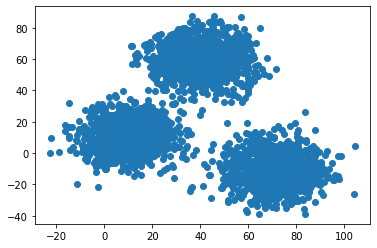

In [5]:
plt.scatter(X_feature, Y_feature)

In [6]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

In [7]:
Y_scaled = np.array([])
X_scaled = np.array([])
for coordinate in scaled_df:
    Y_scaled = np.append(Y_scaled, coordinate[1])
    X_scaled = np.append(X_scaled, coordinate[0])
    

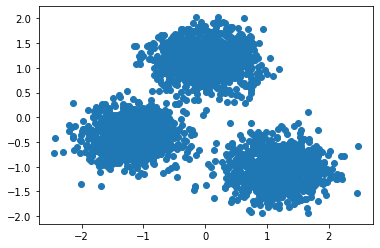

In [8]:
#The coordinate change
plt.scatter(X_scaled, Y_scaled)

### Draw an Elbow Curve for KMeans

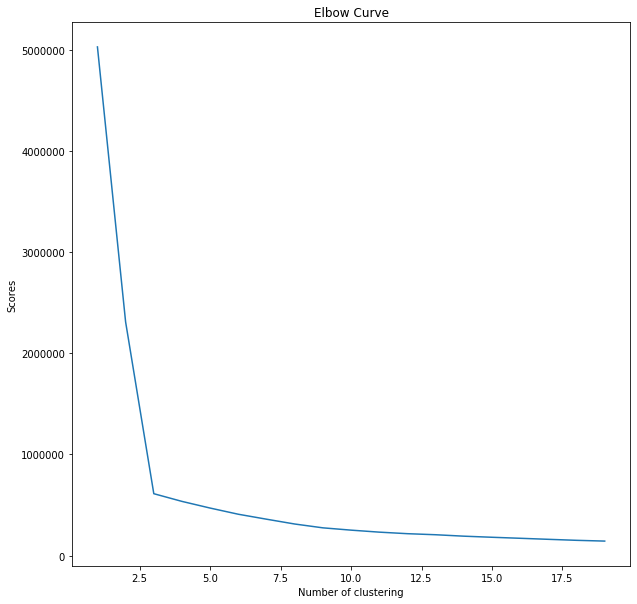

In [9]:
n_of_clusters = range(1, 20)
kmeans = [KMeans(n_clusters = value) for value in n_of_clusters]
scores = [np.abs(algo.fit(df).score(df)) for algo in kmeans]
fig, ax = plt.subplots(figsize=(10,10))
plt.plot(n_of_clusters,scores)
plt.title("Elbow Curve")
plt.ylabel("Scores")
plt.xlabel("Number of clustering")
plt.show()

### This shows that 3 clusters is the best byfar

In [20]:
kmeans = KMeans(n_clusters = 3)
kmeans = kmeans.fit(df)

In [21]:
kmeans.labels_

array([2, 2, 2, ..., 1, 1, 1], dtype=int32)

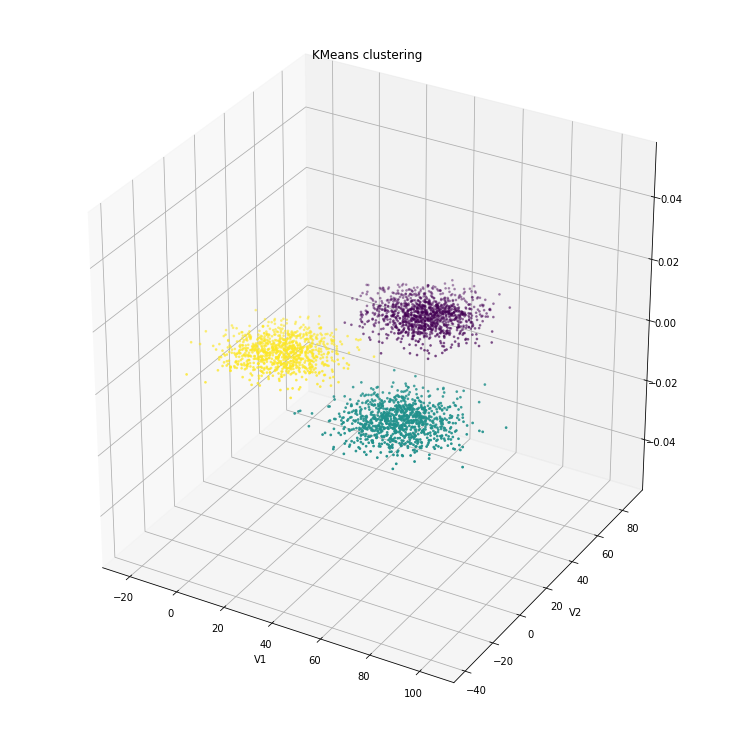

In [22]:
fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig)
ax.scatter(X_feature, Y_feature ,c=kmeans.labels_, s=3, cmap="viridis")
plt.title("KMeans clustering")
plt.xlabel("V1")
plt.ylabel("V2")
plt.show()

### Lets use DBScan


In [43]:
dbscan_clustering = DBSCAN(eps = 6, min_samples = 10)
dbscan_clustering = dbscan_clustering.fit(df)

dbscan_clustering.labels_

array([0, 0, 0, ..., 2, 2, 2])

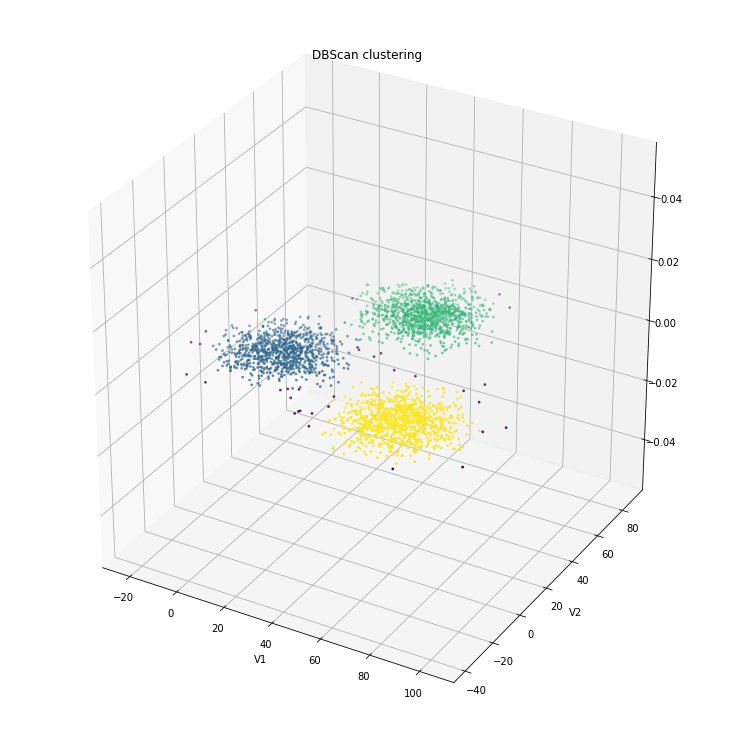

In [44]:
fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig)
ax.scatter(X_feature, Y_feature ,c=dbscan_clustering.labels_, s=3, cmap="viridis")
plt.title("DBScan clustering")
plt.xlabel("V1")
plt.ylabel("V2")
plt.show()

### Lets use Heirarchal Clustering
* Single_link
* Complex_link
* Average_link
* Ward_link

In [69]:
single_link = AgglomerativeClustering(n_clusters = 3, linkage = "single")
single_link_cluster = single_link.fit_predict(df)
single_link_cluster

array([2, 2, 2, ..., 2, 2, 2])

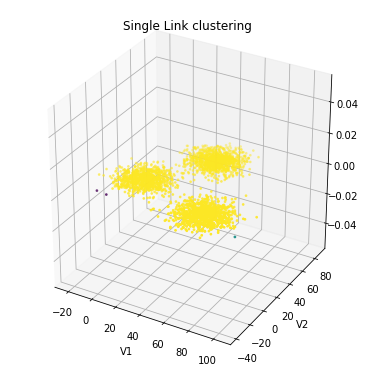

In [70]:
fig = plt.figure(figsize=(5, 5))
ax = Axes3D(fig)
ax.scatter(X_feature, Y_feature ,c=single_link_cluster, s=3, cmap="viridis")
plt.title("Single Link clustering")
plt.xlabel("V1")
plt.ylabel("V2")
plt.show()

In [47]:
complete_link = AgglomerativeClustering(n_clusters = 3, linkage = "complete")
complete_link_labels = complete_link.fit_predict(df)
complete_link_labels

array([1, 1, 1, ..., 0, 0, 0])

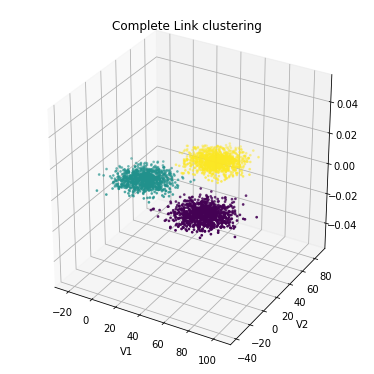

In [48]:
fig = plt.figure(figsize=(5, 5))
ax = Axes3D(fig)
ax.scatter(X_feature, Y_feature ,c= complete_link_labels, s=3, cmap="viridis")
plt.title("Complete Link clustering")
plt.xlabel("V1")
plt.ylabel("V2")
plt.show()

In [51]:
ward_linkage = AgglomerativeClustering(n_clusters = 3)
ward_linkage_clusters = ward_linkage.fit_predict(df)
ward_linkage_clusters

array([2, 2, 2, ..., 1, 1, 1])

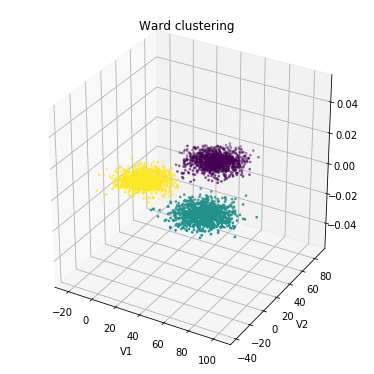

In [72]:
fig = plt.figure(figsize=(5, 5))
ax = Axes3D(fig)
ax.scatter(X_feature, Y_feature ,c=ward_linkage_clusters, s=3, cmap="viridis")
plt.title("Ward clustering")
plt.xlabel("V1")
plt.ylabel("V2")
plt.show()

In [63]:
#Lets plot the single dendrograms too see why it failed
from scipy.cluster.hierarchy import single, dendrogram

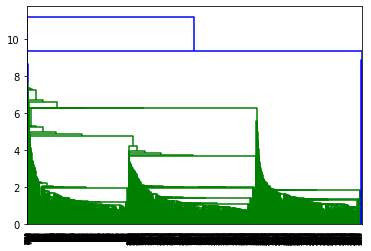

In [64]:
linkage_matrix = single(df)
dendrogram(linkage_matrix)
plt.show()

### Let's use Gaussian Clustering

In [73]:
#Similiar to Kmeans; however, this moves guassian distrubutions and starts at a soft cluster while kmeans starts at a
#Centroid and moves to center of newly init cluster.
from sklearn.mixture import GaussianMixture
gaussian_mixture_model = GaussianMixture(n_components = 3, covariance_type = "spherical")
gaussian_pred = gaussian_mixture_model.fit_predict(df)
gaussian_pred

array([2, 2, 2, ..., 0, 0, 0])

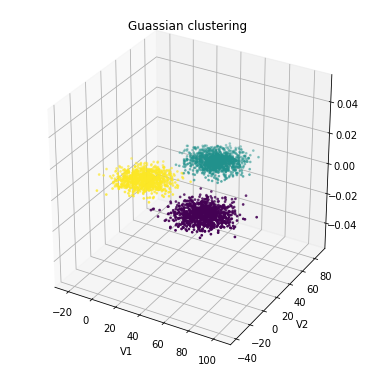

In [75]:
fig = plt.figure(figsize=(5, 5))
ax = Axes3D(fig)
ax.scatter(X_feature, Y_feature ,c=gaussian_pred, s=3, cmap="viridis")
plt.title("Guassian clustering")
plt.xlabel("V1")
plt.ylabel("V2")
plt.show()

### On this very simple dataset all of the model worked very well except single link. It is more built for capturing stretched or oval like clusters.

In [87]:
from sklearn.metrics import silhouette_score
#This score is high for compact clusters that are also far apart
#This score is perfect for our data since most clusters are very circular

In [88]:
#K-Means
k_silhouette_score = silhouette_score(df, kmeans.labels_)
db_scan_silhouette_score = silhouette_score(df, dbscan_clustering.labels_)

In [89]:
print(k_silhouette_score)
print(db_scan_silhouette_score)

0.6945587736089913
0.6587411547792584


In [91]:
#The Single Link cluster are not far apart and two are not compact
single_link_score = silhouette_score(df, single_link_cluster)
print(single_link_score)
# This score will be a lot lower than the other scores.

0.02996091241427347


### Let's create a horrible model and check out the score for that one

In [115]:
horrible_model = DBSCAN(0.1, 1)
horrible_pred = horrible_model.fit_predict(df)
print(horrible_pred)
#This has 2962 clusters for a 3 cluster data

[   0    1    2 ... 2960 2961 2962]


In [116]:
horrible_score = silhouette_score(df, horrible_pred)
horrible_score

0.020729487205324495